# **Malaria Detection - Image Classifier**

<b>Problem Definition</b>

**The context:** According to the WHO's World Malaria Report, cases of malaria in 2022 increased year-over-year (YoY) from 244 million cases to 249 million cases; with the malaria attributed death toll remaining constant at ~608,000 deaths. One common transmitter of malaria is through the bite of a malaria infected mosquito. Another far less discussed transmitter is Transfusion-transmitted malaria (TTM) or malaria infected blood being used in a blood transfusion to an uninfected patient. A recent study in Ghana found that 2.5% of seemingly healthy blood donors harbored malaria parasites without showing any symptoms (Tetteh et al., 2023). <br>
**The objectives:** There have been huge strides in developing cheap malaria kits to be used "in the field" and to quickly test patients demonstrating symptoms within medical treatment facilities. However, more work needs to be done in screening blood within the infrastructure of a hospitals and blood banks to reduce TTM. Creating an image classification CNN to identify malaria infected blood could be a cheap and effective solution. The main objective will be to get False Negative rates below 2.5% of total labeled data. <br>
**The key questions:** Is it possible to accurately identify parasitized blood cells? Can a model be designed that would inherently reduce false-negatives?<br>
**The problem formulation:** Build an accurate image classifier to detect parasitized blood samples


---
<b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


# **Data Setup**

**Notes on Data**

There is some concern that a few images in the provided dataset might have been incorrectly labeled or sorted. After several model builds, I continually found the same images being labeled as infected although they were originally labeled as uninfected. This issue occurred across vastly different models. When visualizing the cells in question, I noticed they contained many of the visual traits as cells originally labeled infected. The possibility of incorrectly labeled original data isn't too outrageous when considering the project problem statement is addressing issues with false negatives.

That said, it is still completely believable that these cells are in fact uninfected and are just difficult to classify because of certain traits that might be misguiding the models.

I had experimented with data augmentation on models that had already performed very well and that did not improve classification. If given the opportunity, I'd train the model on a brand new set of data (not augmented data). I think that would be a critical next step.



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings('ignore')


## Load the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Storing the path of the data file from the Google drive
path = "/content/drive/MyDrive/DS Course/Capstone Project/cell_images.zip"

# Extract file from zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## Setup Directories

In [4]:
# Setup directory paths for parent, test, and train folders
parent_dir = "/content/cell_images"
test_dir = os.path.join(parent_dir, 'test')
train_dir = os.path.join(parent_dir, 'train')

## Load Images

In [5]:
# Parameters Used for Image load and resizing
BLOOD_STATUS = ['parasitized', 'uninfected']
IMG_SIZE = 150

### Load and Resize: Training Images

In [6]:
# Creating a function to load the images and their labels -> for TRAINING DATA

training_data =[]

def create_training_data():
    for blood_status in BLOOD_STATUS:
        path = os.path.join(train_dir, blood_status)
        class_name = blood_status

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_name])

create_training_data()

In [7]:
# Check first image values and label
training_data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'parasitized']

In [8]:
# Check first image shape
training_data[0][0].shape

(150, 150, 3)

Notes: training data has been successfully loaded and labeled. The images are also in the correct 150x150x3 dimensions.

### Load and Resize: Testing Images

In [9]:
# Creating a function to load the images and their labels -> for TESTING DATA

testing_data = []

def create_testing_data():
    for blood_status in BLOOD_STATUS:
        path = os.path.join(test_dir, blood_status)
        class_name = blood_status

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            testing_data.append([new_array, class_name])

create_testing_data()

In [10]:
# Check first image values and label

testing_data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'parasitized']

In [11]:
# Check first image shape

testing_data[0][0].shape

(150, 150, 3)

Notes: testing data has been successfully loaded and labeled. The images are also in the correct 150x150x3 dimensions.

## Review Data and Vizualize Images

### Check Number of Images in Complete Data Set

In [12]:
train_parasitized_images = [fn for fn in os.listdir(train_dir + '/parasitized')]
train_uninfected_images = [fn for fn in os.listdir(train_dir + '/uninfected')]

test_parasitized_images = [fn for fn in os.listdir(test_dir + '/parasitized')]
test_uninfected_images = [fn for fn in os.listdir(test_dir + '/uninfected')]


print('number of images: TRAIN PARASITIZED ->',len(train_parasitized_images))
print('number of images: TRAIN UNINFECTED ->',len(train_uninfected_images))
print('--------------------------------------------------')
print('number of images: TEST PARASITIZED ->',len(test_parasitized_images))
print('number of images: TEST UNINFECTED ->',len(test_uninfected_images))


number of images: TRAIN PARASITIZED -> 12582
number of images: TRAIN UNINFECTED -> 12376
--------------------------------------------------
number of images: TEST PARASITIZED -> 1300
number of images: TEST UNINFECTED -> 1300


Note: the test data is evenly split between parasitized and uninfected blood cells. However, the training data is not evenly split.

### Vizualize Images

#### Training: Parasitized Blood Cells

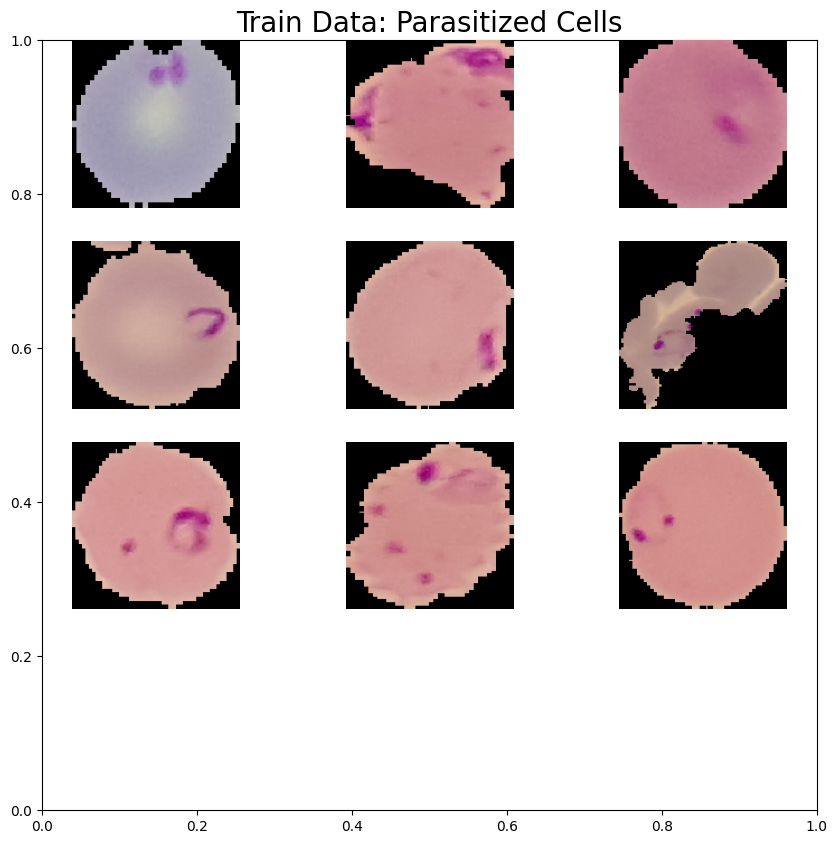

In [13]:
# Selecting 9 random images from the list
select_random_train_parasitized = np.random.choice(train_parasitized_images, 9, replace= False)

# Plot 9 random images
fig = plt.figure(figsize=(10, 10))
plt.title('Train Data: Parasitized Cells', fontsize=20)
for i in range(9):
    ax = fig.add_subplot(4,3,i+1)

    fp = f'{train_dir}/parasitized/{select_random_train_parasitized[i]}'

    fn = load_img(fp, target_size = (150,150))

    plt.imshow(fn, )
    plt.axis('off')


#### Training: Uninfected Blood Cells

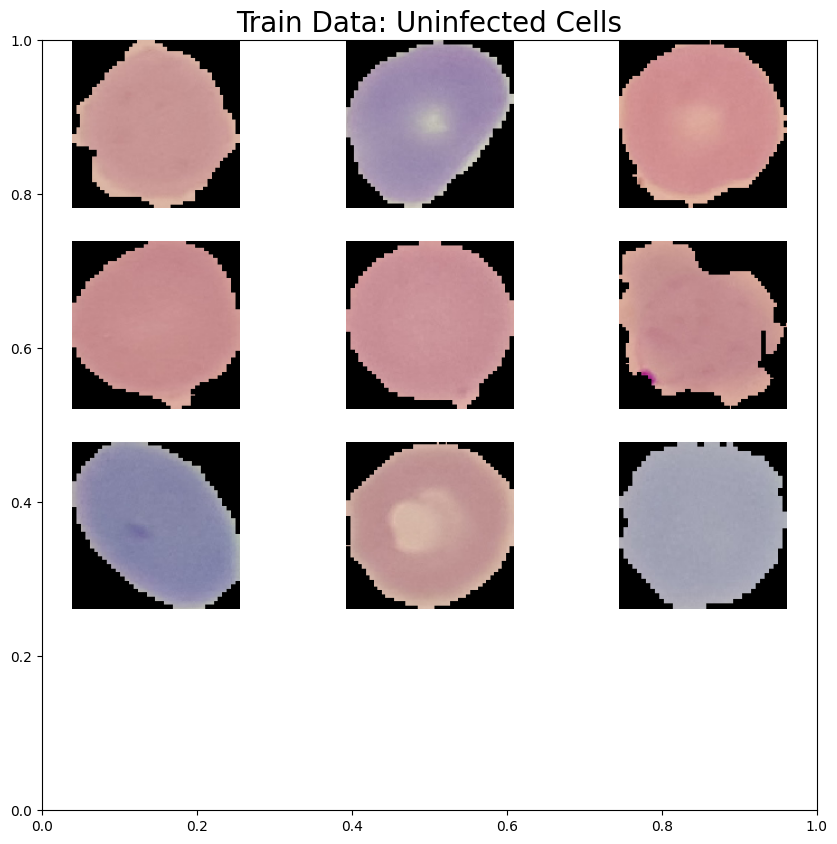

In [14]:
select_random_train_uninfected = np.random.choice(train_uninfected_images, 9, replace= False)  # Selecting 5 random images from the list

fig = plt.figure(figsize=(10, 10))
plt.title('Train Data: Uninfected Cells', fontsize=20)
for i in range(9):
    ax = fig.add_subplot(4,3,i+1)

    fp = f'{train_dir}/uninfected/{select_random_train_uninfected[i]}'

    fn = load_img(fp, target_size = (150,150))

    plt.imshow(fn, )
    plt.axis('off')


Note: Uninfected cells seem slighly more uniform in shape. Parasitized cells seem to have dark spots within them. It should be noted, however, that there are some uninfected cells that also contain dark spots within them. This could cause issues with classification. This also makes me wonder if there might have been mistakes in the developmenet of the dataset and some parasitized samples were labled as uninfected.

## Prep Data for Model Building

### Split X and Y Data

#### Split Training Data

In [15]:
# Setup X_Train and y_train
X_train = []
y_train = []

# random shuffle data before split
np.random.shuffle(training_data)

for image, label in training_data:
    X_train.append(image)
    y_train.append(label)

In [16]:
# Convert to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [17]:
# Check Shape
X_train.shape, y_train.shape

((24958, 150, 150, 3), (24958,))

Note: There are 24,958 images in x train and an equal number of labels in y train

#### Split Testing Data

In [18]:
# Setup X_Test and y_test
X_test = []
y_test = []

# random shuffle data before split
np.random.shuffle(testing_data)

for image, label in testing_data:
    X_test.append(image)
    y_test.append(label)



In [19]:
# Convert to array
X_test = np.array(X_test)
y_test = np.array(y_test)


In [20]:
# Check Shape
X_test.shape, y_test.shape

((2600, 150, 150, 3), (2600,))

Note: as with the training data, the test data has an equal number of images and labels in x test and y train, respectively.

### Setup X for Models

#### Normalize X Train and Test

In [21]:
# Divide X Values by 255.0 to Normalize
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
# Check Min and Max are between 0 and 1
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, 0.0, 1.0)

Note: the min and max values of 0 and 1 confirm the normalization of x train and x test

### Setup Y for Models

#### Convert Y to DataFrame

In [23]:
# Convert train and test Y array to DF as dtype Object
y_train = pd.DataFrame(y_train, columns = ['label'], dtype = 'object')
y_test = pd.DataFrame(y_test, columns = ['label'], dtype = 'object')

In [24]:
# Review Y_Train DF
y_train

,label
0,parasitized
1,uninfected
2,parasitized
3,parasitized
4,parasitized
...,...
24953,parasitized
24954,parasitized
24955,parasitized
24956,parasitized


In [25]:
# Review Y_Test DF
y_test

,label
0,uninfected
1,uninfected
2,parasitized
3,uninfected
4,uninfected
...,...
2595,uninfected
2596,uninfected
2597,parasitized
2598,uninfected


Note: y train and y test have been converted to DataFrames for easier manipulation

In [26]:
# Review Distribution of Y Train and Test DataFrames
print(y_train.label.value_counts(normalize=True))
print('---------------------------------')
print(y_test.label.value_counts(normalize=True))

parasitized    0.504127
uninfected     0.495873
Name: label, dtype: float64
---------------------------------
uninfected     0.5
parasitized    0.5
Name: label, dtype: float64


Note: as previously mentioned, there is an uneven distribution of parasitized and uninfected samples within the train dataset

#### OHE Y Train and Test

##### Y_train

In [27]:
# Build y_train_encoded
y_train_encoded = []

# Convert Parasitized to 0, Uninfected to 1
for label_name in y_train.label:
    if label_name == 'parasitized':
        y_train_encoded.append(0)
    else:
        y_train_encoded.append(1)

In [28]:
# OHE y_train
y_train_encoded = to_categorical(y_train_encoded)
y_train_encoded

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [29]:
# Compare shape of X and Y Train
y_train_encoded.shape , X_train.shape

((24958, 2), (24958, 150, 150, 3))

Note: after processing, both x and y data are ready for model building.

##### Y Test

In [30]:
# Build y_test_encoded
y_test_encoded = []

# Convert Parasitized to 0, Uninfected to 1
for label_name in y_test.label:
    if label_name == 'parasitized':
        y_test_encoded.append(0)
    else:
        y_test_encoded.append(1)


In [31]:
# OHE y_test
y_test_encoded = to_categorical(y_test_encoded)
y_test_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [32]:
# Compare shape of X and Y Test
y_test_encoded.shape, X_test.shape

((2600, 2), (2600, 150, 150, 3))

Note: after processing, both x and y data are ready for testing models.

# **Model Building**

In [33]:
backend.clear_session()
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## Model A.0 - Primary Model (Simple and Effective)


**Model A.0 Summary**

*Convolutional Layer*

1.   Layer 1
*   Conv2d: 64 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding
*   Dropout: 0.2

2.   Layer 2
*   Conv2d: 32 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding
*   Dropout: 0.2

3.   Layer 3
*   Conv2d: 16 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding

*Full Connected Network*

1.   Flatten Layer
2.   Dense Layer: 128 neurons and LeakyRelu activation
3.   Dense Layer: 64 neurons and LeakyRelu activation
4.   Output Layer: 2 neurons and Sigmoid activation

*Compiler*


*   Optimizer: Adam with learning rate 0.001
*   Loss function: Binary Crossentropy
*   Metrics: Accuracy


*Notes*

This model outperformed all models tested during developmenet. The main breakthrough was implementing LeakyRelu and the final width and depth of the model. Other approaches included Batch Normalization, Data Augmentation, and Transer Learning.

Summary of resouce costs across data setup and traning:
Time of training: appx 6 minutes and 30 seconds
Epochs till Early Stop: 9

*   Sytem RAM Peak Usage: 30.1 GB
*   GBU RaM Peak Usage: 8.1 GB
*   Disk Usage: 27 GB

### MA0 Build

In [ ]:
modelA0 = Sequential()

modelA0.add(Conv2D(64, (3, 3), padding='same', input_shape=(150,150,3)))
modelA0.add(LeakyReLU(alpha=0.1))
modelA0.add(MaxPooling2D((2, 2), padding='same'))
modelA0.add(Dropout(0.2))

modelA0.add(Conv2D(32, (3, 3), padding='same'))
modelA0.add(LeakyReLU(alpha=0.1))
modelA0.add(MaxPooling2D((2, 2), padding='same'))
modelA0.add(Dropout(0.2))

modelA0.add(Conv2D(16, (3, 3), padding='same'))
modelA0.add(LeakyReLU(alpha=0.1))
modelA0.add(MaxPooling2D((2, 2), padding='same'))

modelA0.add(Flatten())

modelA0.add(Dense(128, activation=LeakyReLU(alpha=0.01)))
modelA0.add(Dense(64, activation=LeakyReLU(alpha=0.01)))
modelA0.add(Dense(2, activation='sigmoid'))

modelA0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                        

In [ ]:
optimizer = Adam(learning_rate=0.001)
modelA0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### MA0 Fitting

In [ ]:
# Setup callback variables for Early Stopping and Model Checkpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('modelA0.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# Fit Model A.0 and save performance to history_A0
history_A0 = modelA0.fit(X_train, y_train_encoded,batch_size=20, epochs=30, validation_split= 0.1, callbacks=[es, mc])

Epoch 1/30
1124/1124 [==============================] - ETA: 0s - loss: 0.3286 - accuracy: 0.8266
Epoch 1: val_accuracy improved from -inf to 0.95433, saving model to modelA0.h5
1124/1124 [==============================] - 49s 37ms/step - loss: 0.3286 - accuracy: 0.8266 - val_loss: 0.1644 - val_accuracy: 0.9543
Epoch 2/30
1123/1124 [============================>.] - ETA: 0s - loss: 0.1121 - accuracy: 0.9649
Epoch 2: val_accuracy improved from 0.95433 to 0.96995, saving model to modelA0.h5
1124/1124 [==============================] - 39s 35ms/step - loss: 0.1121 - accuracy: 0.9649 - val_loss: 0.1075 - val_accuracy: 0.9700
Epoch 3/30
1123/1124 [============================>.] - ETA: 0s - loss: 0.0831 - accuracy: 0.9743
Epoch 3: val_accuracy improved from 0.96995 to 0.97877, saving model to modelA0.h5
1124/1124 [==============================] - 39s 35ms/step - loss: 0.0832 - accuracy: 0.9743 - val_loss: 0.0934 - val_accuracy: 0.9788
Epoch 4/30
1123/1124 [============================>.] -

### MA0 Evaluate

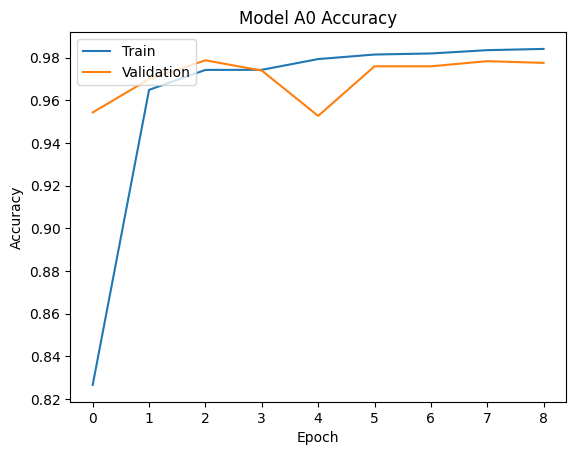

In [ ]:
# plot validation and train accuracy over epochs
plt.plot(history_A0.history['accuracy'])
plt.plot(history_A0.history['val_accuracy'])
plt.title('Model A0 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Note: Model A.0 has performed well. Naturally, I am slightly worried about overfitting. This problem could be addressed with a larger dataset.

In [ ]:
# Evaludate Model A.0 on test data
modelA0.evaluate(X_test, y_test_encoded)

82/82 [==============================] - 2s 15ms/step - loss: 0.1923 - accuracy: 0.9677


[0.19225755333900452, 0.9676923155784607]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

82/82 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1300
           1       0.98      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



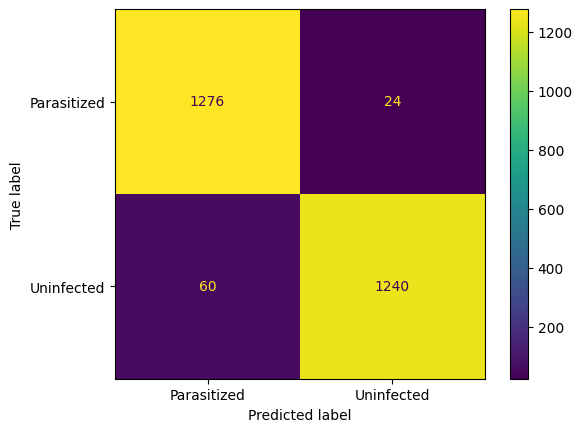

In [ ]:
# print classificaton report
y_pred = modelA0.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_true, y_pred))

# build confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Parasitized', 'Uninfected'])
disp.plot()
plt.show()

Model A.0 has performed very well. Most important of all, the false negative rate was 0.9% which is signifficanyly below the target of 2%.

## Model B.0 - Secondary Model (larger dimensions)

**Model B.0 Summary**

*Convolutional Layer*

1.   Layer 1
*   Conv2d: 128 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding
*   Dropout: 0.2

2.   Layer 2
*   Conv2d: 64 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding
*   Dropout: 0.2

3.   Layer 3
*   Conv2d: 32 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding
*   Dropout: 0.2

4.   Layer 4
*   Conv2d: 16 3x3 filters, LeakyRelu activation, and padding
*   MaxPooling2d: 2x2 with padding

*Full Connected Network*

1.   Flatten Layer
2.   Dense Layer: 128 neurons and LeakyRelu activation
3.   Dense Layer: 64 neurons and LeakyRelu activation
4.   Dense Layer: 64 neurons and LeakyRelu activation
5.   Output Layer: 2 neurons and Sigmoid activation

*Compiler*

*   Optimizer: Adam with learning rate 0.001
*   Loss function: Binary Crossentropy
*   Metrics: Accuracy

*Notes*

After seeing positive results from Model A, I decided to expand the width and depth of my model to see if I could push my KPIs a bit further in the correct direction.  

Summary of resouce costs across data setup and traning:
Time of training: appx 19 minutes and 50 seconds
Epochs till Early Stop: 16

*   Sytem RAM Peak Usage: 25.8 GB
*   GBU RaM Peak Usage: 13.7 GB
*   Disk Usage: 27 GB


### MB0 Build

In [34]:
modelB0 = Sequential()

modelB0.add(Conv2D(128, (3, 3), padding='same', input_shape=(150,150,3)))
modelB0.add(LeakyReLU(alpha=0.1))
modelB0.add(MaxPooling2D((2, 2), padding='same'))
modelB0.add(Dropout(0.2))

modelB0.add(Conv2D(64, (3, 3), padding='same'))
modelB0.add(LeakyReLU(alpha=0.1))
modelB0.add(MaxPooling2D((2, 2), padding='same'))
modelB0.add(Dropout(0.2))

modelB0.add(Conv2D(32, (3, 3), padding='same'))
modelB0.add(LeakyReLU(alpha=0.1))
modelB0.add(MaxPooling2D((2, 2), padding='same'))
modelB0.add(Dropout(0.2))

modelB0.add(Conv2D(16, (3, 3), padding='same'))
modelB0.add(LeakyReLU(alpha=0.1))
modelB0.add(MaxPooling2D((2, 2), padding='same'))

modelB0.add(Flatten())

modelB0.add(Dense(128, activation=LeakyReLU(alpha=0.01)))
modelB0.add(Dense(64, activation=LeakyReLU(alpha=0.01)))
modelB0.add(Dense(2, activation='sigmoid'))

modelB0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        73792     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                        

In [35]:
optimizer = Adam(learning_rate=0.001)
modelB0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### MB0 Fitting

In [36]:
# Setup callback variables for Early Stopping and Model Checkpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('modelB0.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [37]:
# Fit Model B.0 and save performance to history_B0
history_B0 = modelB0.fit(X_train, y_train_encoded,batch_size=20, epochs=30, validation_split= 0.1, callbacks=[es, mc])

Epoch 1/30
1124/1124 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.7648
Epoch 1: val_accuracy improved from -inf to 0.96635, saving model to modelB0.h5
1124/1124 [==============================] - 89s 72ms/step - loss: 0.3985 - accuracy: 0.7648 - val_loss: 0.1405 - val_accuracy: 0.9663
Epoch 2/30
1123/1124 [============================>.] - ETA: 0s - loss: 0.0881 - accuracy: 0.9744
Epoch 2: val_accuracy improved from 0.96635 to 0.97756, saving model to modelB0.h5
1124/1124 [==============================] - 78s 69ms/step - loss: 0.0881 - accuracy: 0.9744 - val_loss: 0.0802 - val_accuracy: 0.9776
Epoch 3/30
1123/1124 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9764
Epoch 3: val_accuracy improved from 0.97756 to 0.97837, saving model to modelB0.h5
1124/1124 [==============================] - 78s 70ms/step - loss: 0.0735 - accuracy: 0.9764 - val_loss: 0.0719 - val_accuracy: 0.9784
Epoch 4/30
1123/1124 [============================>.] -

### MB0 Evaluate

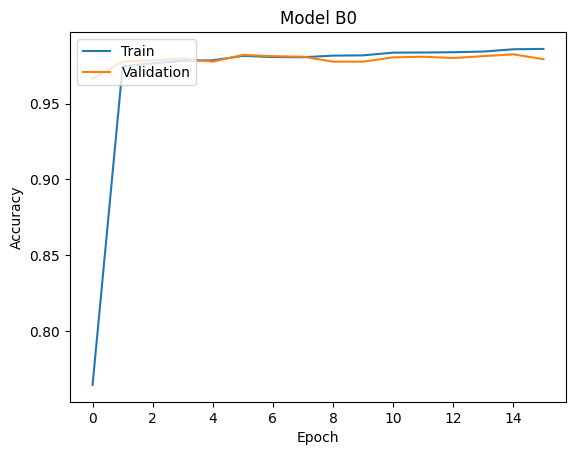

In [38]:
# Plot validation and train accuracy over epochs
plt.plot(history_B0.history['accuracy'])
plt.plot(history_B0.history['val_accuracy'])
plt.title('Model B0')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Note: More epochs were required than Model A.0 but there were better results. The plot does slightly suggest overfitting.

In [39]:
# Evaludate Model B.0 on test data
modelB0.evaluate(X_test, y_test_encoded)

82/82 [==============================] - 3s 27ms/step - loss: 0.0959 - accuracy: 0.9800


[0.09586819261312485, 0.9800000190734863]

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

82/82 [==============================] - 2s 23ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



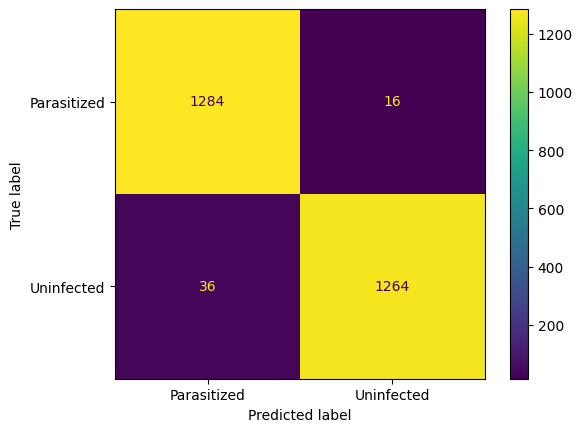

In [41]:
# Print classificaton report
y_pred = modelB0.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_true, y_pred))

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Parasitized', 'Uninfected'])
disp.plot()
plt.show()

Notes: Model B.0 outperformed Model A.0 at a much higher training expense. Available resouces should be taken into consideration when determining model for implementation.

# Conclusion

**Recommendations**

My recommendation is really dependent on available resources. While Model B.0 outperformed Model A.0, Model B.0 was very resource intensive. If a hospital or blood bank had access to the needed hardware than Model B.0 should be implemented. If, however, the entity interested in applying this model is low on resources than Model A.0 would be better for them.

Either way, both models proved immensely effective at classifying images and, more importantly, reducing the False Negative rate. Reduction of False Negatives to below 2.5% was my primary objective with these final models and that goal was clearly achieved as Model A.0 achieved 0.9% and Model B.0 achieved 0.6%.

**Next Steps**

Above all, these models need to be trained on a totally different dataset. If possible, the dataset needs to be vigorously analyzed before training begins to confirm there are no false negatives or false positives existing in the dataset.

With time, I would have continued to finetune in order to reduce the demand on resources while maintaining accuracy and low false negative rates. In the end, however, I feel very confident with the final models I have provided.
